In [152]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [153]:
overdoses = pd.read_csv("FatalOverdoses.csv")

In [154]:
overdoses.head()

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,2021-03-29T16:02:00,Accident,41,F,W,MO,Heroin,Fentanyl,Acetyl Fentanyl,Oxycodone,Phenobarbital,Etizolam,Trazodone,Clonazepam,Acetaminophen,NaN,15110,NaN,2021
1,2018-06-20T18:14:00,Accident,50,F,W,MO,Alcohol,Carfentanil,Citalopram/Escitalopram,Clonazepam,Cocaine,Diphenhydramine,Methadone,Mirtazapine,Para-FluoroisobutyrylFentanyl,NaN,15235,NaN,2018
2,2018-04-23T20:34:00,Accident,40,M,W,MO,Cocaine,Despropionyl Fentanyl 4-ANPP,Fentanyl,Heroin,Methadone,Methoxyacetyl Fentanyl,Nordiazepam,Para-FluoroisobutyrylFentanyl,Phenobarbital,NaN,15209,NaN,2018
3,2018-01-24T13:47:00,Accident,48,F,W,MO,Acetaminophen,Alcohol,Butalbital,Cyclobenzaprine,Despropionyl Fentanyl 4-ANPP,Dextromethorphan,Fentanyl,Hydrocodone,Tramadol,NaN,15227,NaN,2018
4,2017-04-18T13:37:00,Accident,54,M,W,MO,Carfentanil,Chlordiazepoxide,Diazepam,Fentanyl,Heroin,Oxazepam,Para-Fluorobutyryl Fentanyl/FIBF,Temazepam,Tramadol,NaN,15221,NaN,2017


In [155]:
overdoses1 = overdoses.groupby("case_year").count()

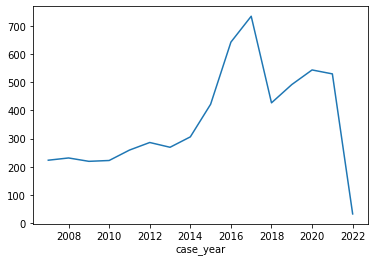

In [156]:
overdoses1["death_date_and_time"].plot()

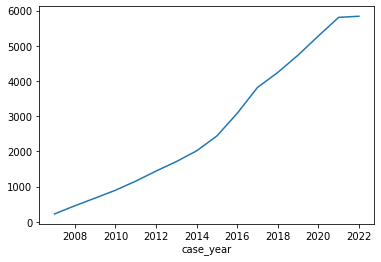

In [157]:
overdoses1["death_date_and_time"].cumsum().plot()

In [158]:
overdoses1 = overdoses.groupby("incident_zip").count()
overdoses2 = overdoses1.filter(like = '151', axis = 0)
overdoses3 = overdoses1.filter(like = '152', axis = 0)
overdoses4 = overdoses1.filter(like = '153', axis = 0)
overdoses5 = overdoses2.append(overdoses3).append(overdoses4)

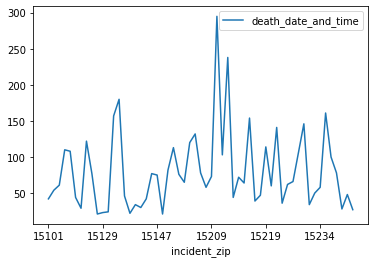

In [159]:
overdoses = overdoses5.iloc[0:, :1]
overdoses1 = overdoses[overdoses.death_date_and_time > 20]
overdoses1.plot()

will then find zip